In [ ]:
library(tidyverse)
library(gridExtra)
library(ape)
library(cowplot)
library(gridGraphics)
library(readr)
library(utils)

#### Load and re-order the first dataset

In [6]:
tmp_windows <- read.delim('IQtree_CDS_concatenated_genetrees_order_reformat.txt', header = F, row.names = 1)

In [8]:
head(tmp_windows)

,V2
,<chr>
1,outfile_Pbar_2022_maker4_00026-RA.rearranged.cln.fa.treefile
2,outfile_Pbar_2022_maker4_00027-RB.rearranged.cln.fa.treefile
3,outfile_Pbar_2022_maker4_00028-RA.rearranged.cln.fa.treefile
4,outfile_Pbar_2022_maker4_00029-RA.rearranged.cln.fa.treefile
5,outfile_Pbar_2022_maker4_00030-RA.rearranged.cln.fa.treefile
6,outfile_Pbar_2022_maker4_00031-RA.rearranged.cln.fa.treefile


In [35]:
colnames(tmp_windows) = "pathname"
windows_and_weights <- tmp_windows %>%
  rowwise() %>%
  mutate(scaffold = str_split(pathname, "outfile_")[[1]][[1]]) %>%
  mutate(scaffold = str_split(pathname, ".rearranged")[[1]][[1]]) %>%
  ungroup() %>%
  mutate(treenumber = row_number()) %>%
  select(-pathname)

windows_and_weights$scaffold <- str_replace(windows_and_weights$scaffold, "outfile_", "")

In [41]:
head(windows_and_weights)

,scaffold,treenumber,topo1,topo2,topo3
,<chr>,<int>,<int>,<int>,<int>
1,Pbar_2022_maker4_00026-RA,1,50,0,0
2,Pbar_2022_maker4_00027-RB,2,50,0,0
3,Pbar_2022_maker4_00028-RA,3,50,0,0
4,Pbar_2022_maker4_00029-RA,4,50,0,0
5,Pbar_2022_maker4_00030-RA,5,50,0,0
6,Pbar_2022_maker4_00031-RA,6,40,10,0


In [37]:
#set up initial weights file and add to windows_and_weights
#toponumber = the number of topologies at the beginning of the weights file
toponumber = 3
tmp_weights <- read.delim("laevis_eatonii_barbatus.iqtree.weights.txt.gz",
                          sep = '\t', skip = toponumber)
windows_and_weights <- cbind(windows_and_weights, tmp_weights)

In [39]:
head(windows_and_weights)

,scaffold,treenumber,topo1,topo2,topo3
,<chr>,<int>,<int>,<int>,<int>
1,Pbar_2022_maker4_00026-RA,1,50,0,0
2,Pbar_2022_maker4_00027-RB,2,50,0,0
3,Pbar_2022_maker4_00028-RA,3,50,0,0
4,Pbar_2022_maker4_00029-RA,4,50,0,0
5,Pbar_2022_maker4_00030-RA,5,50,0,0
6,Pbar_2022_maker4_00031-RA,6,40,10,0


In [42]:
weightsheader <- as.data.frame(readLines("laevis_eatonii_barbatus.iqtree.weights.txt.gz", n = toponumber))

con <- gzfile("REORDERED_WEIGHTS_laevis_eatonii_barbatus.tsv.gz", "w")

write.table(as.data.frame(weightsheader), con,
            quote = F, row.names = F, col.names = F)
write.table(as.data.frame(windows_and_weights), con,
            sep = '\t', quote = F, row.names = F)

In [40]:
#now, reorder first by scaffold, then by start column
#windows_and_weights <- arrange(windows_and_weights, scaffold, start)

In [6]:
#first, windows:
#newwindow <- windows_and_weights[,1:6]

In [7]:
#write windows file
#con <- gzfile("REORDERED_WINDOWS_10kbtrees.tsv.gz", "w")
#write.table(as.data.frame(newwindow), con,
#            sep = '\t', quote = F, row.names = F)
#close(con)

In [8]:
#next, the weights (and header for the weights file):
#starts at col 8 and continues to the end of the table
#newweights <- windows_and_weights[,8:ncol(windows_and_weights)]
#weightsheader <- as.data.frame(readLines("laevis_eatonii_barbatus.iqtree.weights.txt.gz",
                                         #n = toponumber))

#con <- gzfile("REORDERED_WEIGHTS_laevis_eatonii_barbatus.tsv.gz", "w")
#write.table(as.data.frame(weightsheader), con,
            #quote = F, row.names = F, col.names = F)
#write.table(as.data.frame(newweights), con,
            #sep = '\t', quote = F, row.names = F)
#close(con)

#### Load and re-order the second dataset

In [45]:
tmp_windows <- read.delim('IQtree_CDS_concatenated_genetrees_order_reformat.txt', header = F, row.names = 1)

colnames(tmp_windows) = "pathname"
windows_and_weights <- tmp_windows %>%
  rowwise() %>%
  mutate(scaffold = str_split(pathname, "outfile_")[[1]][[1]]) %>%
  mutate(scaffold = str_split(pathname, ".rearranged")[[1]][[1]]) %>%
  ungroup() %>%
  mutate(treenumber = row_number()) %>%
  select(-pathname)

windows_and_weights$scaffold <- str_replace(windows_and_weights$scaffold, "outfile_", "")
  
#set up initial weights file and add to windows_and_weights
#toponumber = the number of topologies at the beginning of the weights file
toponumber = 3
tmp_weights <- read.delim("virgatus_barbatus_eatonii.iqree.weights.txt.gz",
                          sep = '\t', skip = toponumber)
windows_and_weights <- cbind(windows_and_weights, tmp_weights)

weightsheader <- as.data.frame(readLines("virgatus_barbatus_eatonii.iqree.weights.txt.gz", n = toponumber))

con <- gzfile("REORDERED_WEIGHTS_virgatus_barbatus_eatonii.tsv.gz", "w")

write.table(as.data.frame(weightsheader), con,
            quote = F, row.names = F, col.names = F)
write.table(as.data.frame(windows_and_weights), con,
            sep = '\t', quote = F, row.names = F)

#### Plotting the results

In [10]:
#call in the twisst plotting functions provided by devs
source("/home/lcwheeler/Downloads/twisst/plot_twisst.R")

#window data file
window_data_file <- "REORDERED_WINDOWS_10kbtrees.tsv.gz"

#info for test 1 and test 2 weights
weights_file1 <- "REORDERED_WEIGHTS_laevis_eatonii_barbatus.tsv.gz"
weights_file2 <- "REORDERED_WEIGHTS_virgatus_barbatus_eatonii.tsv.gz"



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [11]:
#generate twisst data frames
twisst_data1 <- import.twisst(weights_files=weights_file1,
                             window_data_files=window_data_file)

twisst_data2 <- import.twisst(weights_files=weights_file2,
                              window_data_files=window_data_file)

[1] "Reading weights and window data"
[1] "Number of regions: 11"
[1] "Computing summaries"
[1] "Cleaning data"
[1] "Getting topologies"
[1] "Reading weights and window data"
[1] "Number of regions: 11"
[1] "Computing summaries"
[1] "Cleaning data"
[1] "Getting topologies"


In [12]:
#generate list for good scaffolds
scaflist <- names(twisst_data1$lengths)
scaflist <- scaflist[scaflist %in% 
                       c("LG01", "LG02", "LG03", "LG04", "LG05", "LG06", "LG07", "LG08")]

In [13]:
scaflist

[1] "LG01" "LG02" "LG03" "LG04" "LG05" "LG06" "LG07" "LG08"

In [14]:
#set up new df to append to and eventually plot
newdf <- data.frame()

#set up test 1 df in the newdf
for (i in 1:length(scaflist)){
  twisst_subdata <- subset.twisst.by.regions(twisst_data1, scaflist[i])
  twisst_data_smooth <- smooth.twisst(twisst_subdata, span_bp = 2000000, spacing = 5000)
  
  #make new df
  tmpdf <- as.data.frame(twisst_data_smooth$pos); colnames(tmpdf)[1] <- "pos"
  tmpdf$chromosome <- scaflist[i]
  tmpdf$testno <- "test1"
  tmpdf <- cbind(tmpdf, as.data.frame(twisst_data_smooth$weights))
  
  
  #bind to newdf
  newdf <- rbind(newdf, tmpdf)
}

[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"


In [15]:
#and now add the test 2 information so we can plot all together
for (i in 1:length(scaflist)){
  twisst_subdata <- subset.twisst.by.regions(twisst_data2, scaflist[i])
  twisst_data_smooth <- smooth.twisst(twisst_subdata, span_bp = 2000000, spacing = 5000)
  
  #make new df
  tmpdf <- as.data.frame(twisst_data_smooth$pos); colnames(tmpdf)[1] <- "pos"
  tmpdf$chromosome <- scaflist[i]
  tmpdf$testno <- "test2"
  tmpdf <- cbind(tmpdf, as.data.frame(twisst_data_smooth$weights))
  
  
  #bind to newdf
  newdf <- rbind(newdf, tmpdf)
}

[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"
[1] "smoothing topo1"
[1] "smoothing topo2"
[1] "smoothing topo3"


In [16]:
newdf

,pos,chromosome,testno,topo1,topo2,topo3
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,5001,LG01,test1,0.9668818,0.012701667,0.020416498
2,10001,LG01,test1,0.9680176,0.012250967,0.019731475
3,15001,LG01,test1,0.9691271,0.011807190,0.019065714
4,20001,LG01,test1,0.9702106,0.011370344,0.018419102
5,25001,LG01,test1,0.9712680,0.010940437,0.017791525
6,30001,LG01,test1,0.9722997,0.010517475,0.017182869
7,35001,LG01,test1,0.9733055,0.010101466,0.016593020
8,40001,LG01,test1,0.9742857,0.009692419,0.016021866
9,45001,LG01,test1,0.9752404,0.009290339,0.015469291


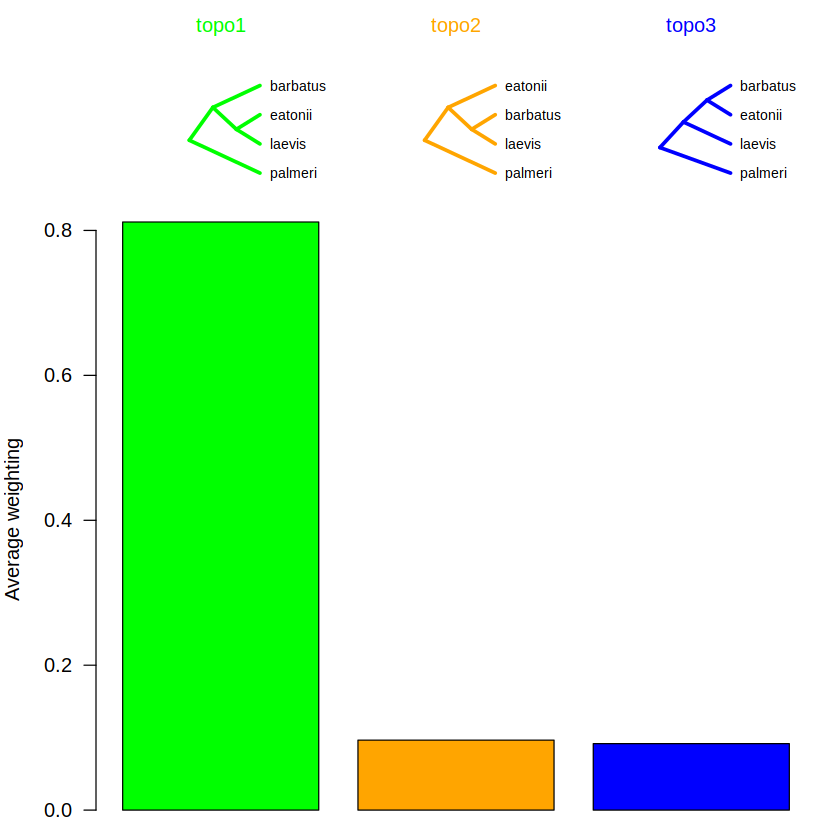

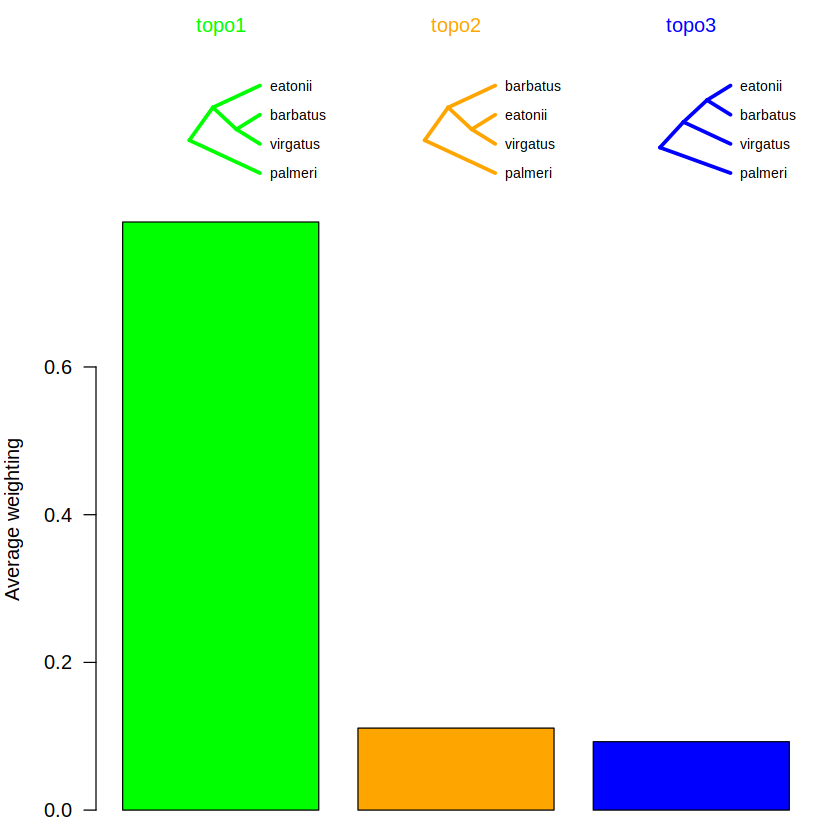

In [17]:

#generate plots of each topo and average weightings for the two tests
t1 <- subset.twisst.by.regions(twisst_data1, scaflist)
plot.twisst.summary(t1, cols = c("green", "orange", "blue"), lwd=3, cex=0.7)
a <- recordPlot()

t2 <- subset.twisst.by.regions(twisst_data2, scaflist)
plot.twisst.summary(t2, cols = c("green", "orange", "blue"), lwd=3, cex=0.7)
b <- recordPlot()

In [18]:
#plot output, facet grid by chromosome and test
c <- ggplot(newdf, aes(x = pos/1000000)) +
  geom_ribbon(aes(y = topo1, ymin = 0, ymax = topo1), col = "green", fill = "green", alpha = 0.25) + 
  geom_ribbon(aes(y = topo2, ymin = 0, ymax = topo2), col = "orange", fill = "orange", alpha = 0.25) + 
  geom_ribbon(aes(y = topo3, ymin = 0, ymax = topo3), col = "blue", fill = "blue", alpha = 0.25) + 
  ylim(c(0,1)) +
  facet_grid(testno ~ chromosome,
             scales = "free_x", space = "free_x") +
  xlab("Position on scaffold (Mb)") +
  ylab("Weightings")


In [19]:
#generate plot
rightpanel <- plot_grid(a, b, ncol = 1, scale = c(0.8, 0.8))

pdf("barbatus_eatonii_tests.pdf", width = 40, height = 10)
plot_grid(c, rightpanel, ncol = 2, rel_widths = c(6,1), scale = c(0.95, 0.95))
dev.off()


png 
  2

### Examine peak overlap between tests

In [21]:
library(pracma)


Attaching package: ‘pracma’


The following object is masked from ‘package:purrr’:

    cross




In [22]:
signal <- copy(newdf)

In [23]:
signal["topo3_diff"] <- signal["topo3"] - signal["topo2"]

In [35]:
max(signal$topo3_diff)

[1] 0.3040403

In [36]:
min(signal$topo3_diff)

[1] -0.280088

In [24]:
signal

,pos,chromosome,testno,topo1,topo2,topo3,topo3_ratio,topo3_diff
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5001,LG01,test1,0.9668818,0.012701667,0.020416498,1.607387,0.007714831
2,10001,LG01,test1,0.9680176,0.012250967,0.019731475,1.610606,0.007480508
3,15001,LG01,test1,0.9691271,0.011807190,0.019065714,1.614755,0.007258524
4,20001,LG01,test1,0.9702106,0.011370344,0.018419102,1.619925,0.007048758
5,25001,LG01,test1,0.9712680,0.010940437,0.017791525,1.626217,0.006851088
6,30001,LG01,test1,0.9722997,0.010517475,0.017182869,1.633745,0.006665394
7,35001,LG01,test1,0.9733055,0.010101466,0.016593020,1.642635,0.006491554
8,40001,LG01,test1,0.9742857,0.009692419,0.016021866,1.653031,0.006329447
9,45001,LG01,test1,0.9752404,0.009290339,0.015469291,1.665094,0.006178952


##### Subset the transformed signal by test and then subtract test 2 topo3_diff from test 1

In [25]:
t1_signal <- signal[signal$testno %in% c("test1"),]
t2_signal <- signal[signal$testno %in% c("test2"),]

In [26]:
# This is the difference of differences: a lower value is equivalent to less difference in the topo1-topo2 diff between tests
t1_signal["test_diff_topo3"] = t1_signal$topo3_diff  - t2_signal$topo3_diff

##### Plot the transformed topo weighting signals

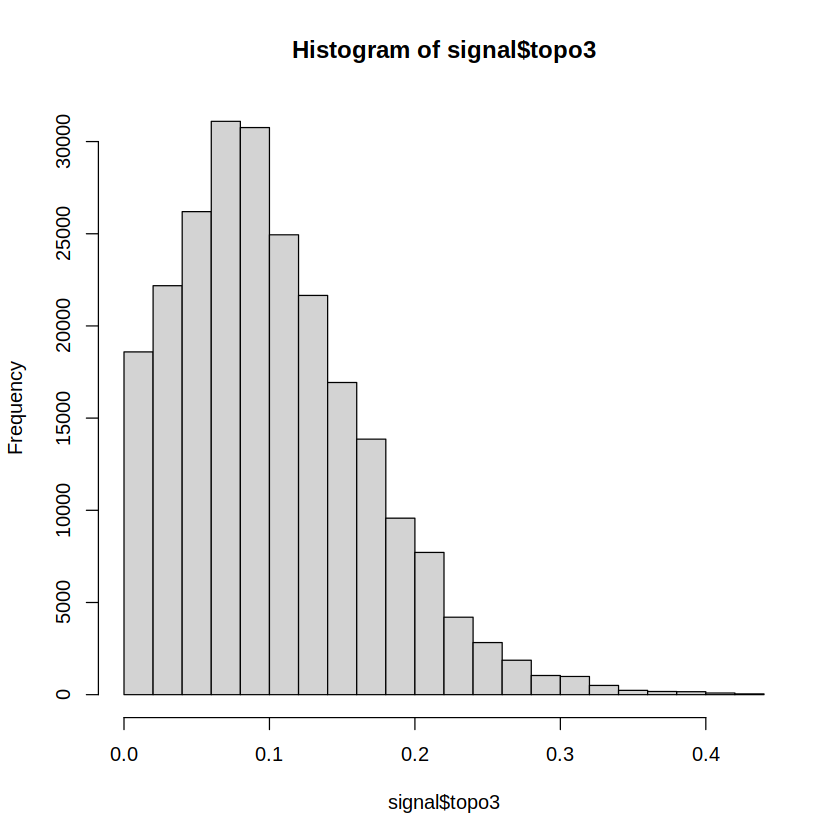

In [64]:
hist(signal$topo3)

In [33]:
#plot output, facet grid by chromosome and test
ct <- ggplot(signal, aes(x = pos/1000000)) +
  geom_line(aes(y = topo3_diff), col = "blue", alpha = 1) + 
  ylim(c(-0.5,0.5)) +
  facet_grid(testno ~ chromosome,
             scales = "free_x", space = "free_x") +
  xlab("Position on scaffold (Mb)") +
  ylab("Difference topo3-topo2 Weightings")

#generate plot
rightpanel <- plot_grid(a, b, ncol = 1, scale = c(0.8, 0.8))

pdf("barbatus_eatonii_tests-2Mb-5kb-smoothing-diff.pdf", width = 40, height = 10)
plot_grid(ct, rightpanel, ncol = 2, rel_widths = c(6,1), scale = c(0.95, 0.95))
dev.off()

png 
  2

In [28]:
#plot output, facet grid by chromosome and test
ct <- ggplot(t1_signal, aes(x = pos/1000000)) +
  geom_line(aes(y = test_diff_topo3, ymin = -1, ymax = test_diff_topo3), col = "blue", alpha = 1) + 
  ylim(c(-1,1)) +
  facet_grid(testno ~ chromosome,
             scales = "free_x", space = "free_x") +
  xlab("Position on scaffold (Mb)") +
  ylab("Difference topo3-topo2 Weightings Test1 - Test2 diff")

#generate plot
rightpanel <- plot_grid(a, b, ncol = 1, scale = c(0.8, 0.8))

pdf("barbatus_eatonii_tests-2Mb-5kb-smoothing-test-diffs.pdf", width = 40, height = 10)
plot_grid(ct, rightpanel, ncol = 2, rel_widths = c(6,1), scale = c(0.95, 0.95))
dev.off()

Warning message in geom_line(aes(y = test_diff_topo3, ymin = -1, ymax = test_diff_topo3), :
“Ignoring unknown aesthetics: ymin and ymax”


png 
  2

In [42]:
print(min(t1_signal$test_diff_topo3))
print(max(t1_signal$test_diff_topo3))

[1] -0.3504416
[1] 0.4533488


[1] -0.004259868
[1] -0.00368402
[1] 0.06269238


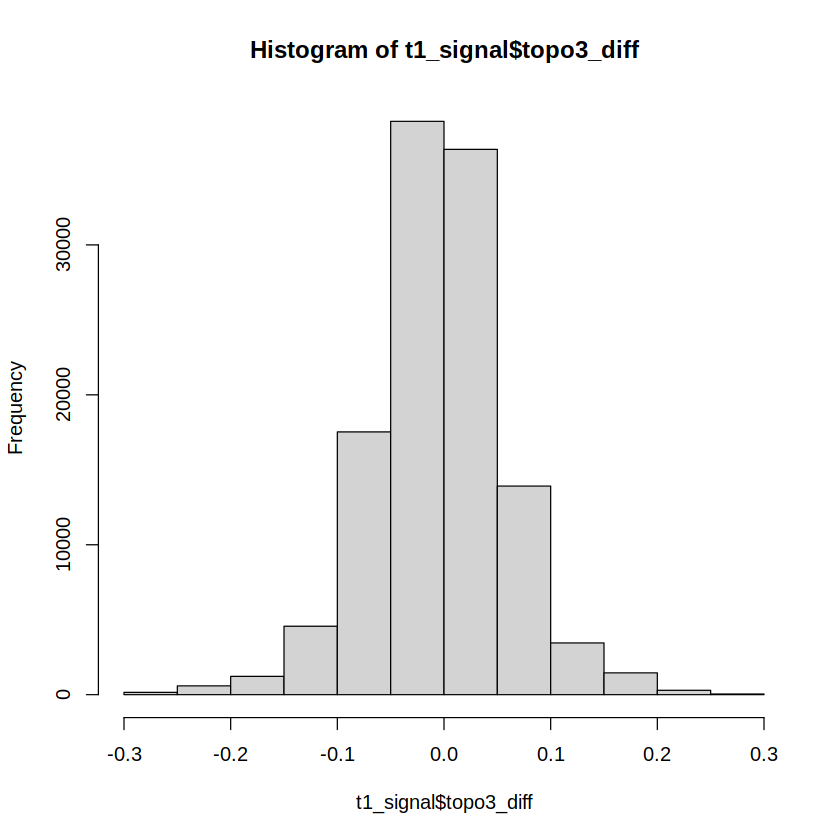

In [53]:
print(mean(t1_signal$topo3_diff))
print(median(t1_signal$topo3_diff))
print(std(t1_signal$topo3_diff))

hist(t1_signal$topo3_diff)

[1] -0.01286744
[1] -0.01001148
[1] 0.06691898


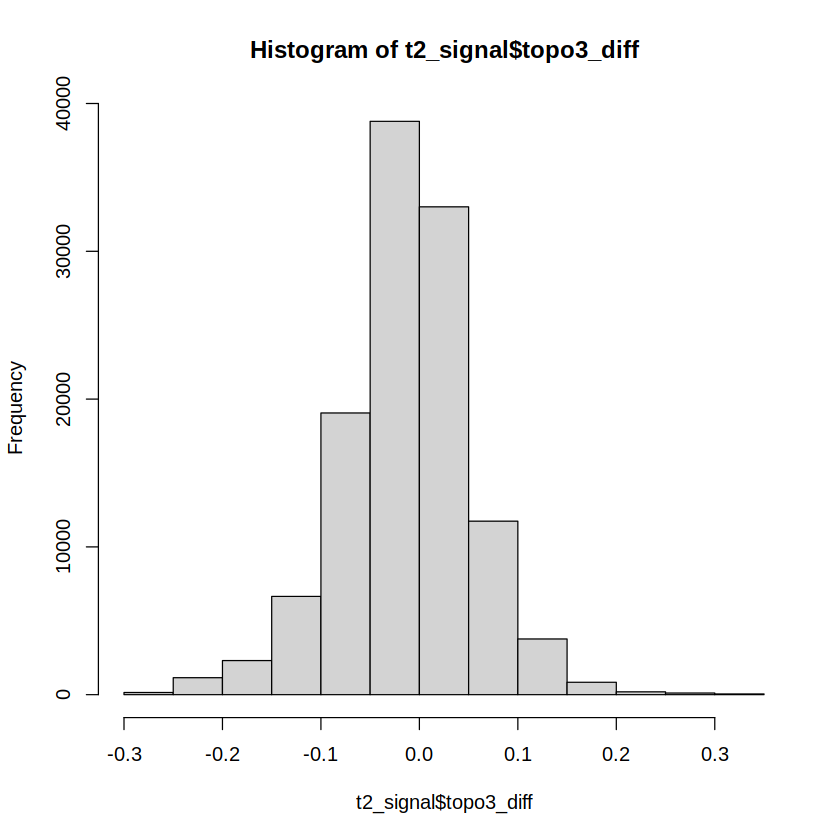

In [54]:
print(mean(t2_signal$topo3_diff))
print(median(t2_signal$topo3_diff))
print(std(t2_signal$topo3_diff))

hist(t2_signal$topo3_diff)

[1] 0.008607575
[1] 0.007393036
[1] 0.09180295


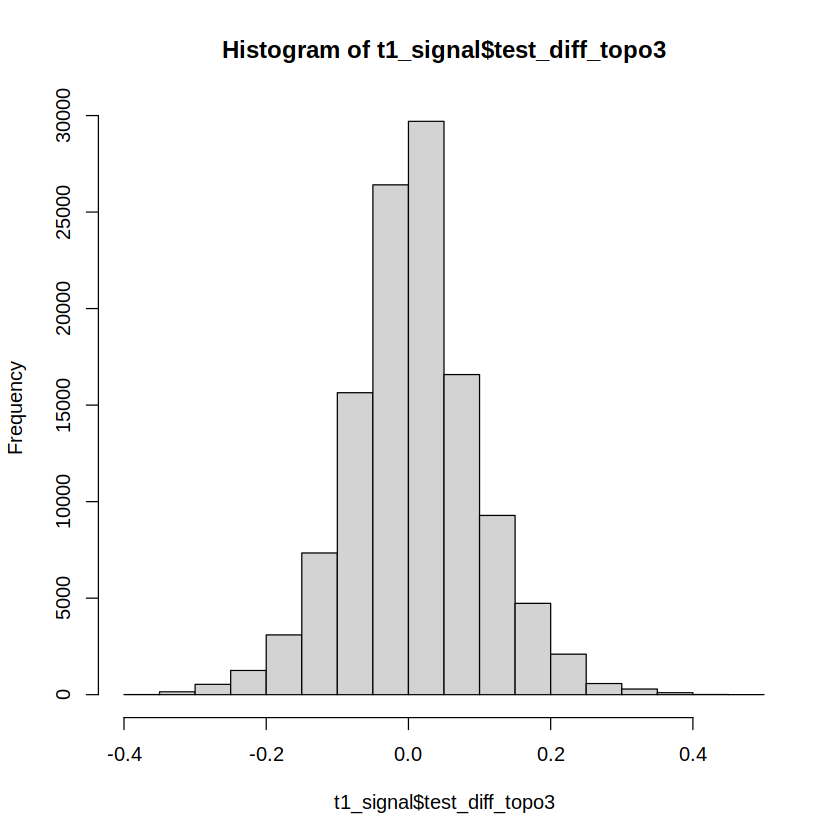

In [55]:
print(mean(t1_signal$test_diff_topo3))
print(median(t1_signal$test_diff_topo3))
print(std(t1_signal$test_diff_topo3))

hist(t1_signal$test_diff_topo3)

#### Subset the extreme values based on total percentage of weight
Extract the cases where the topo3 (discordant/introgression) topology makes up at least 30% of the weight. These will be cases that might indicate a strong signal of introgression. They are in the upper tail of the distribution of weights. 

In [66]:
t1_signal_sub <- subset(t1_signal, topo3 >= 0.3)

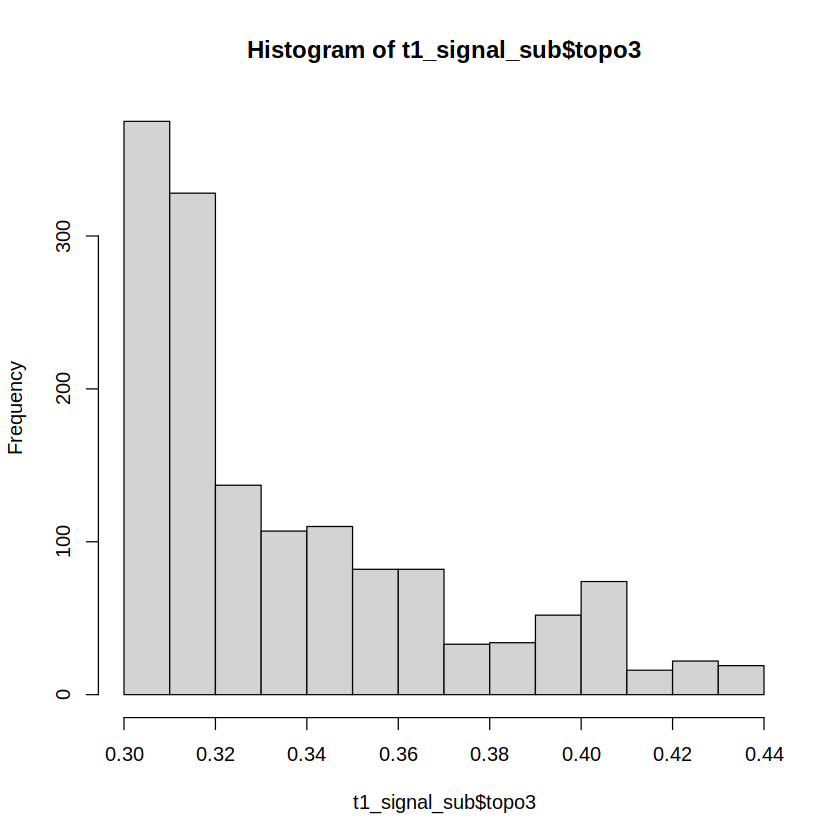

In [67]:
hist(t1_signal_sub$topo3)

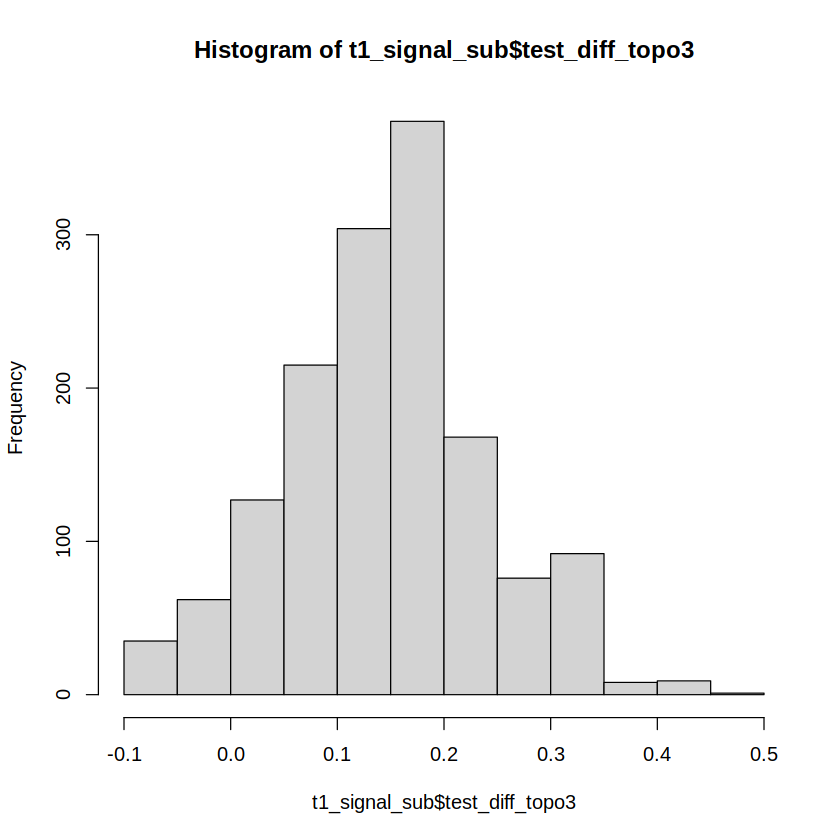

In [68]:
hist(t1_signal_sub$test_diff_topo3)

In [79]:
# Transform the difference of differences so that a higher value is indicative of similarity
t1_signal_sub["test_diff_topo3_inv"] = 1-t1_signal_sub["test_diff_topo3"]

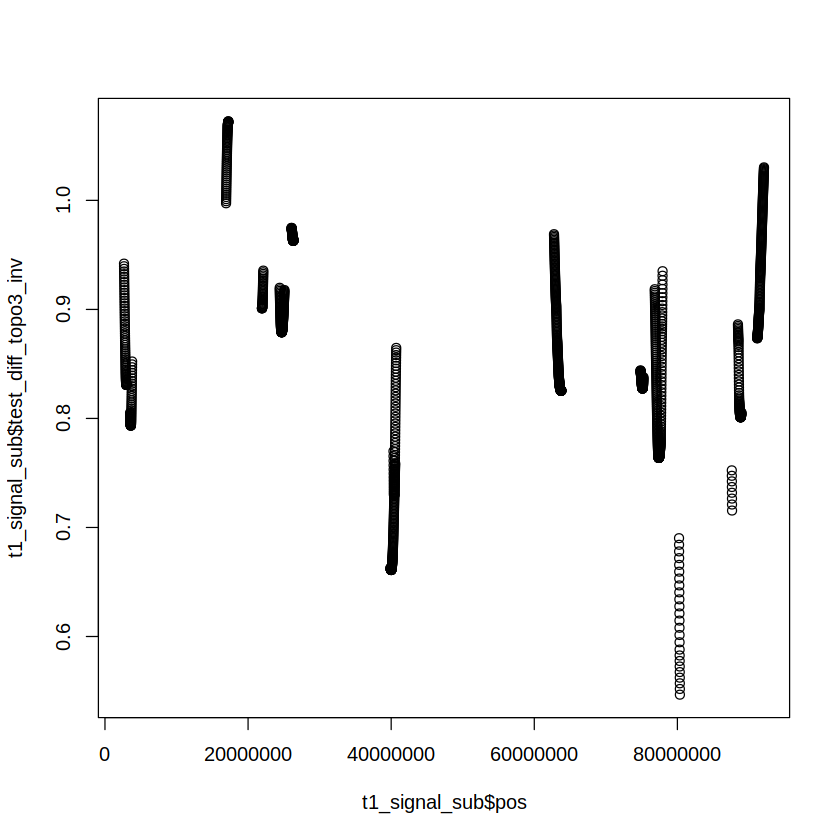

In [80]:
plot(t1_signal_sub$test_diff_topo3_inv ~ t1_signal_sub$pos)

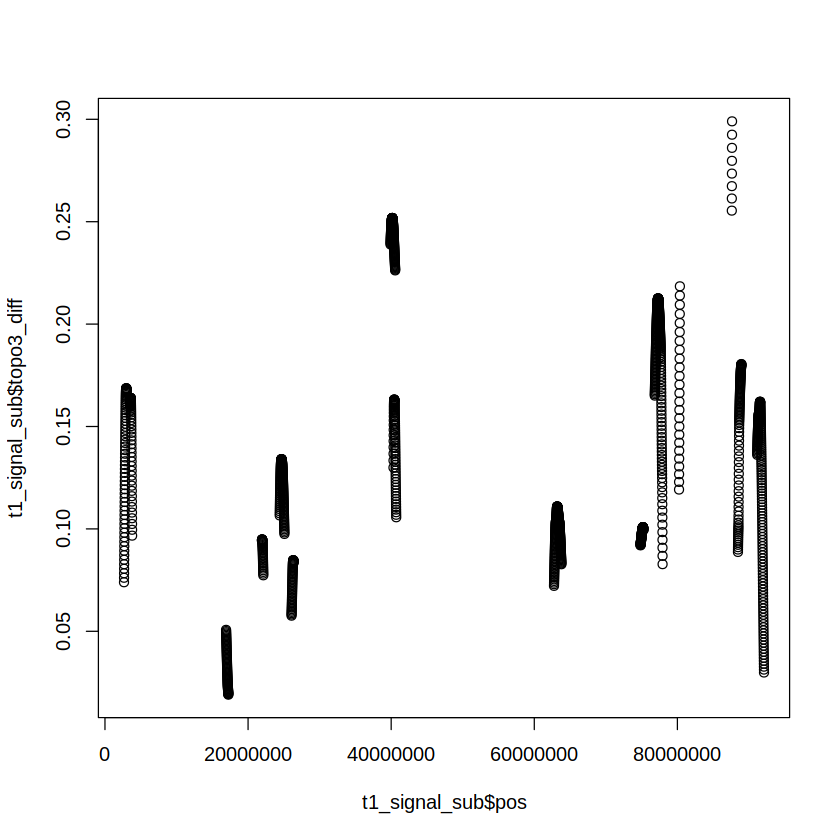

In [76]:
plot(t1_signal_sub$topo3_diff ~ t1_signal_sub$pos)

#### Use findpeaks to identify peaks in the dataset
Idenfity peaks in the transformed difference of differences, where a higher value indicates greater similarity between the two mirrored tests

In [81]:
peaks <- findpeaks(t1_signal_sub$test_diff_topo3_inv)

In [82]:
peaks

0.8440682,209,200,265
0.9185298,292,265,406
0.9350498,511,406,536
0.7523988,537,536,544
1.0725062,609,544,612
0.9355987,649,612,706
0.9177947,782,706,800
0.7698981,914,800,932
0.9748474,992,932,1040
0.9639326,1050,1040,1125
1.0302883,1338,1125,1408


In [84]:
t1_signal_sub[t1_signal_sub$test_diff_topo3_inv %in% peaks[,1],]

,pos,chromosome,testno,topo1,topo2,topo3,topo3_ratio,topo3_diff,test_diff_topo3,test_diff_topo3_inv
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA.11561,74845001,LG01,test1,0.4904772,0.2087847,0.3007381,1.440422,0.09195332,0.15593182,0.8440682
NA.11959,76835001,LG01,test1,0.5632569,0.1358302,0.3009130,2.215362,0.16508281,0.08147020,0.9185298
NA.12178,77930001,LG01,test1,0.4763585,0.2204332,0.3032083,1.375511,0.08277506,0.06495019,0.9350498
NA.13715,87605001,LG03,test1,0.6546856,0.0449544,0.3003600,6.681436,0.25540556,0.24760123,0.7523988
NA.30214,17245001,LG04,test1,0.4173845,0.2817789,0.3008366,1.067633,0.01905765,-0.07250625,1.0725062
NA.127912,22130001,LG04,test1,0.4772875,0.2226885,0.3000241,1.347282,0.07733559,0.06440129,0.9355987
NA.18693,25080001,LG04,test1,0.4973783,0.2025443,0.3000774,1.481540,0.09753314,0.08220534,0.9177947
NA.56119,40320001,LG06,test1,0.5272501,0.1714027,0.3013472,1.758124,0.12994447,0.23010187,0.7698981
NA.124316,26075001,LG07,test1,0.4574844,0.2424444,0.3000712,1.237691,0.05762674,0.02515262,0.9748474


[1] 0.9121721
[1] 0.9267898
[1] 0.09741279


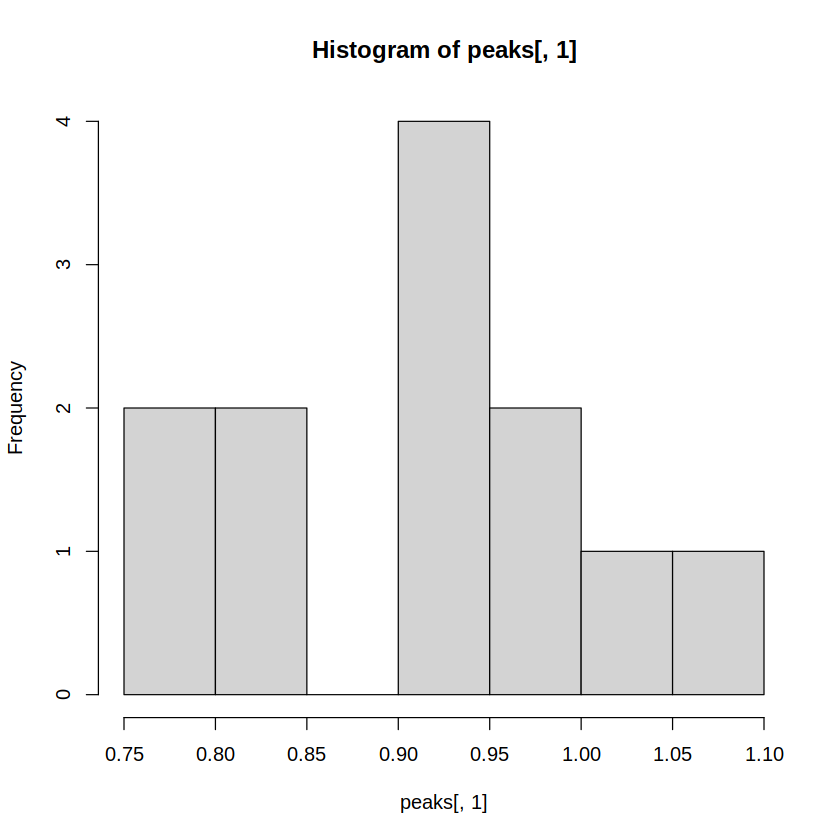

In [85]:
print(mean(peaks[,1]))
print(median(peaks[,1]))
print(std(peaks[,1]))

hist(peaks[,1])

### Examine distribution of topo weights of one across the topos/regions